In [1479]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
plt.rcParams['figure.dpi']=1000

In [1806]:
def lorenz(t, state, s, r, b):
    x, y, z = state
    return [s*(y - x), r*x - y - x*z, x*y - b*z]

In [1827]:
def jacobian(state, s, r, b):
    x, y, z = state
    return np.array([[-s, s, 0], [r - z, -1, -x], [y, x, -b]])

In [1481]:
def lyapunov(x0,x1,delta):
    dist = np.sqrt((x0[0,:]-x1[0,:])**2 + (x0[0,:]-x1[0,:])**2 + (x0[0,:]-x1[0,:])**2)
    return dist

In [1848]:
delta = 10**-10
dt = 0.0001
params = [10, 28, 8/3]
T = 15
T2 = 2*T

In [1849]:
sol1test = scipy.integrate.solve_ivp(lorenz, [0,T], [1, 1, 1], t_eval = np.arange(0,T,dt), 
                                     method = 'RK45', args = params)
sol2test = scipy.integrate.solve_ivp(lorenz, [0,T], [1, 1+delta, 1], t_eval = np.arange(0,T,dt),
                                     method = 'RK45', args = params)

sol1 = scipy.integrate.solve_ivp(lorenz, [0,T2], sol1test.y[:,-1], t_eval = np.arange(0,T2,dt), 
                                 method = 'RK45', args = params)
sol2 = scipy.integrate.solve_ivp(lorenz, [0,T2], sol2test.y[:,-1], t_eval = np.arange(0,T2,dt), 
                                 method = 'RK45', args = params)

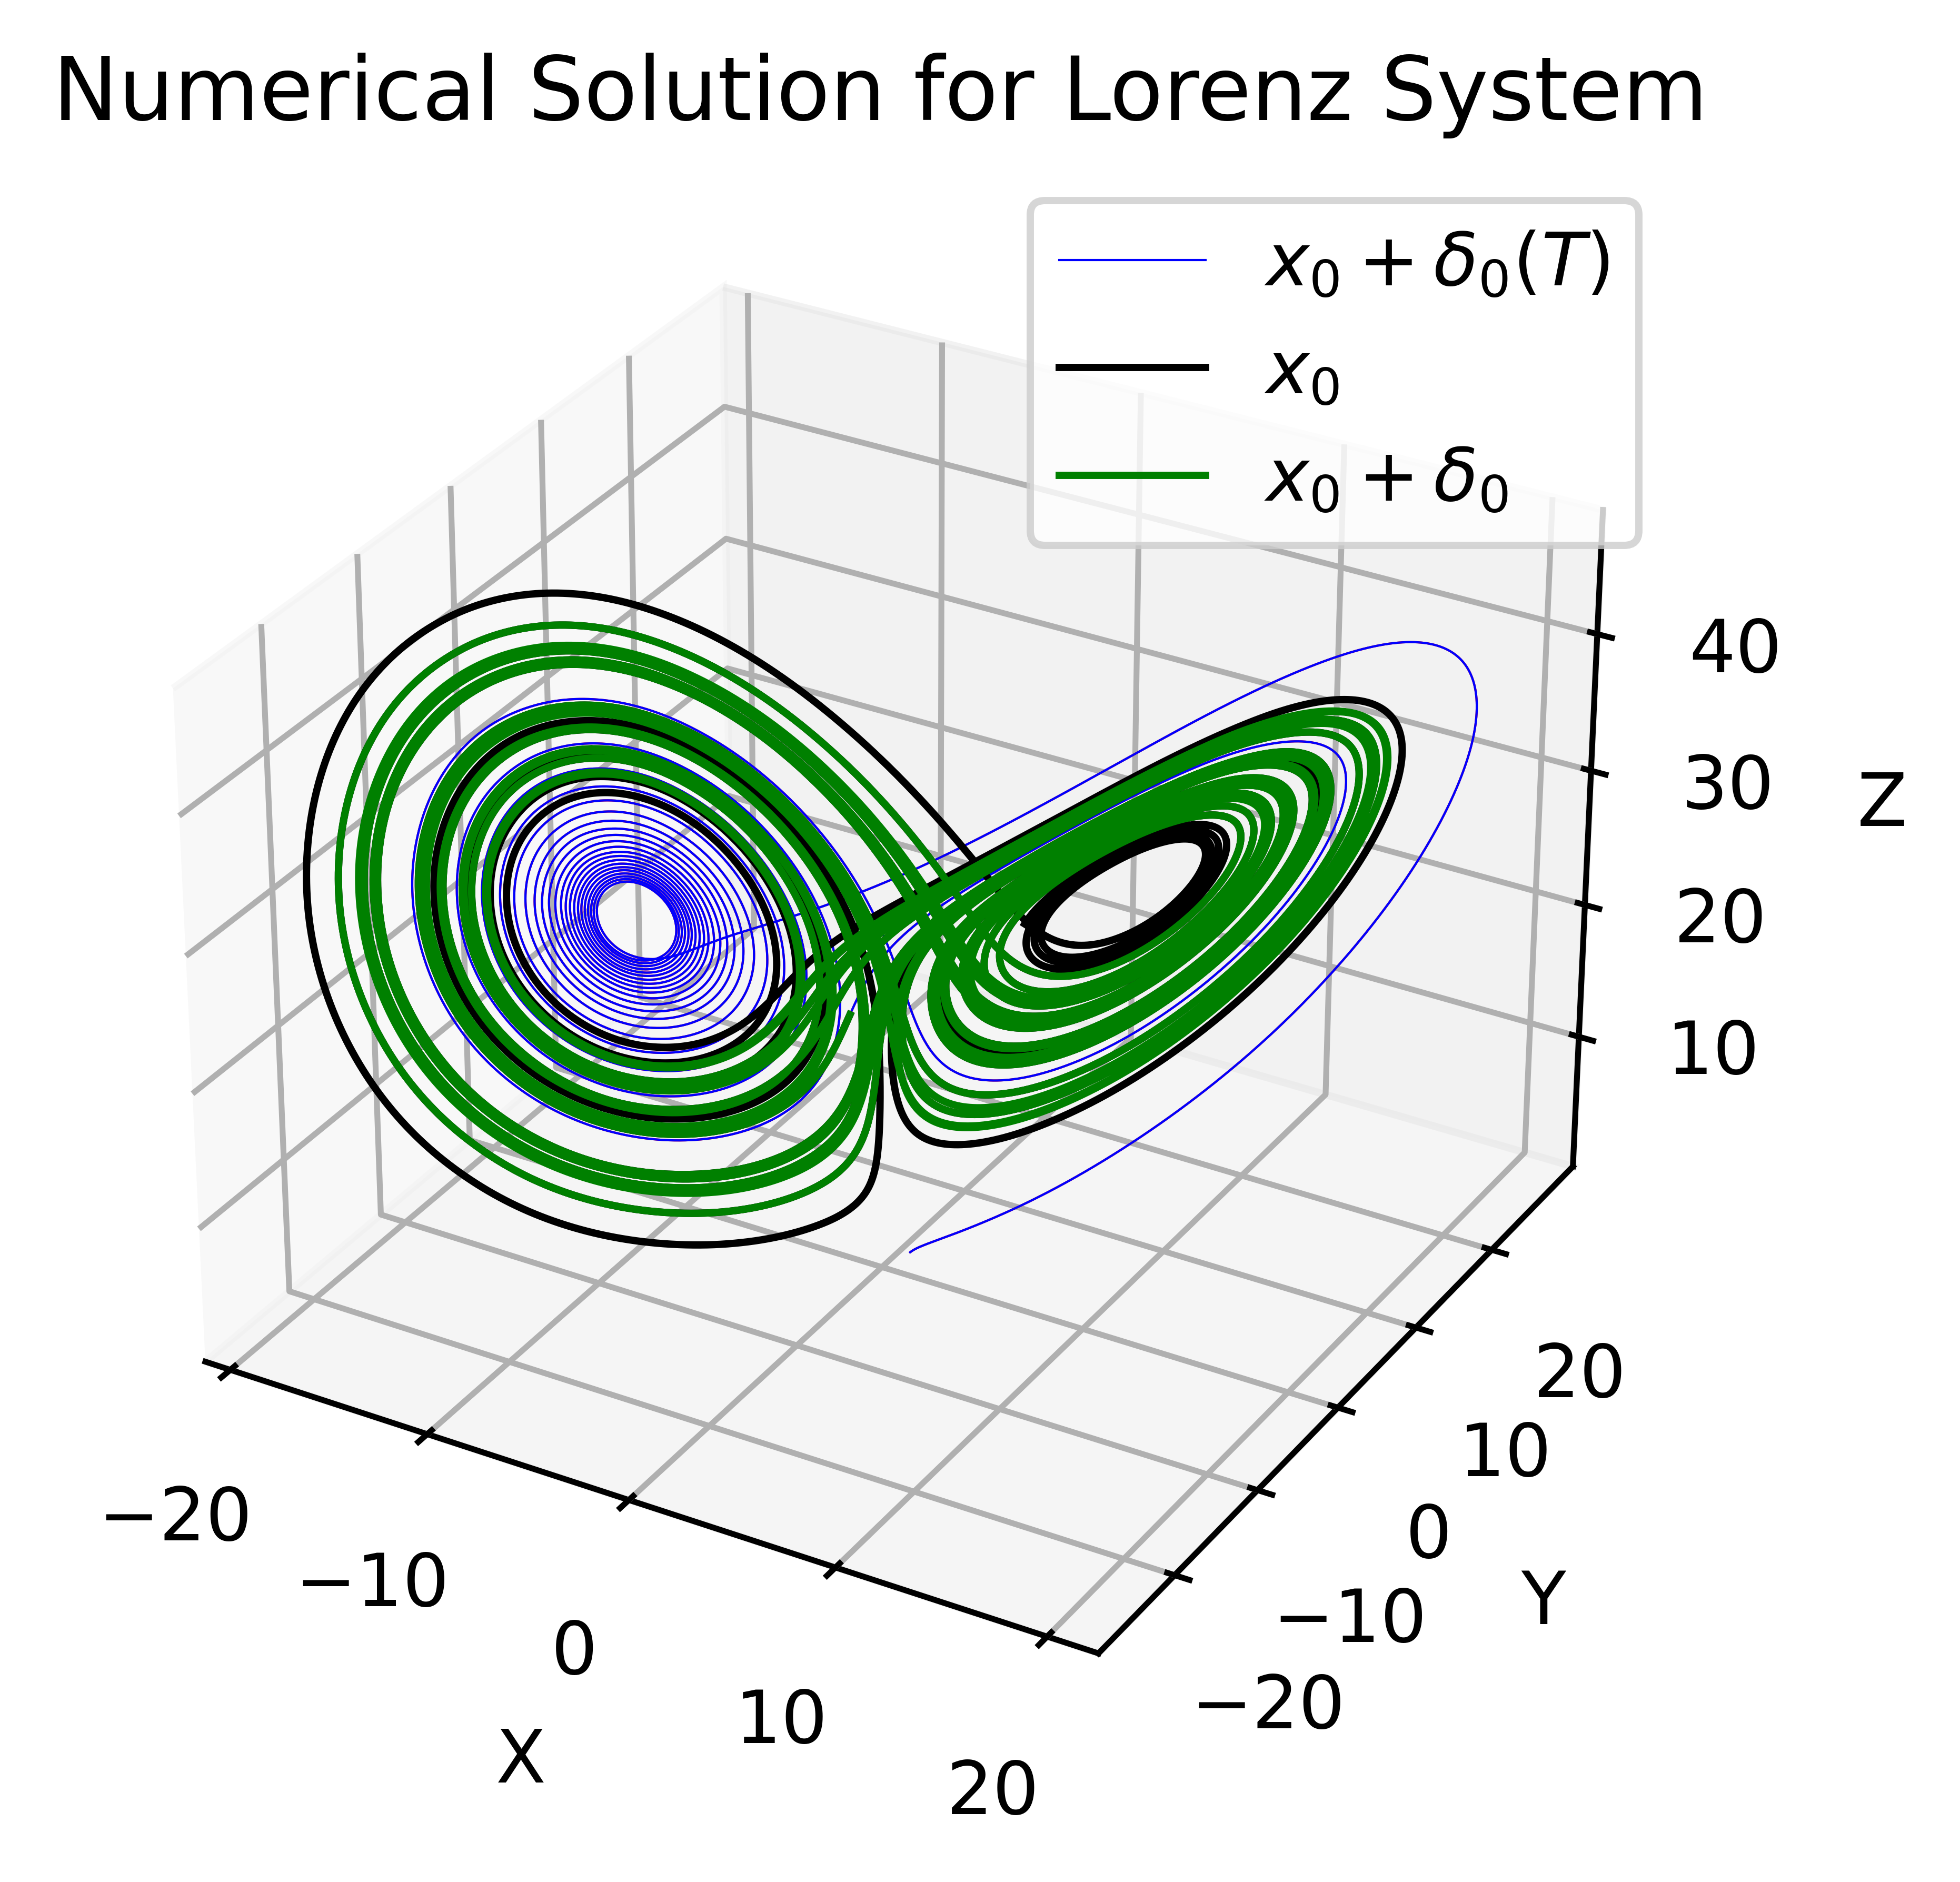

In [1850]:
ax = plt.axes(projection = '3d')
ax.plot(sol1test.y[0,:], sol1test.y[1,:], sol1test.y[2,:], 'r-', lw = 0.3)
ax.plot(sol2test.y[0,:], sol2test.y[1,:], sol2test.y[2,:], 'b-', lw = 0.3, label = '$x_0 + \delta_0 (T)$')
ax.plot(sol1.y[0,:], sol1.y[1,:], sol1.y[2,:], 'k-', lw = 1, label = '$x_0$')
ax.plot(sol2.y[0,:], sol2.y[1,:], sol2.y[2,:], 'g-', lw = 1, label = '$x_0 + \delta_0$')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Numerical Solution for Lorenz System')
ax.legend()
plt.show()

In [1851]:
dist = lyapunov(sol1.y,sol2.y,delta)

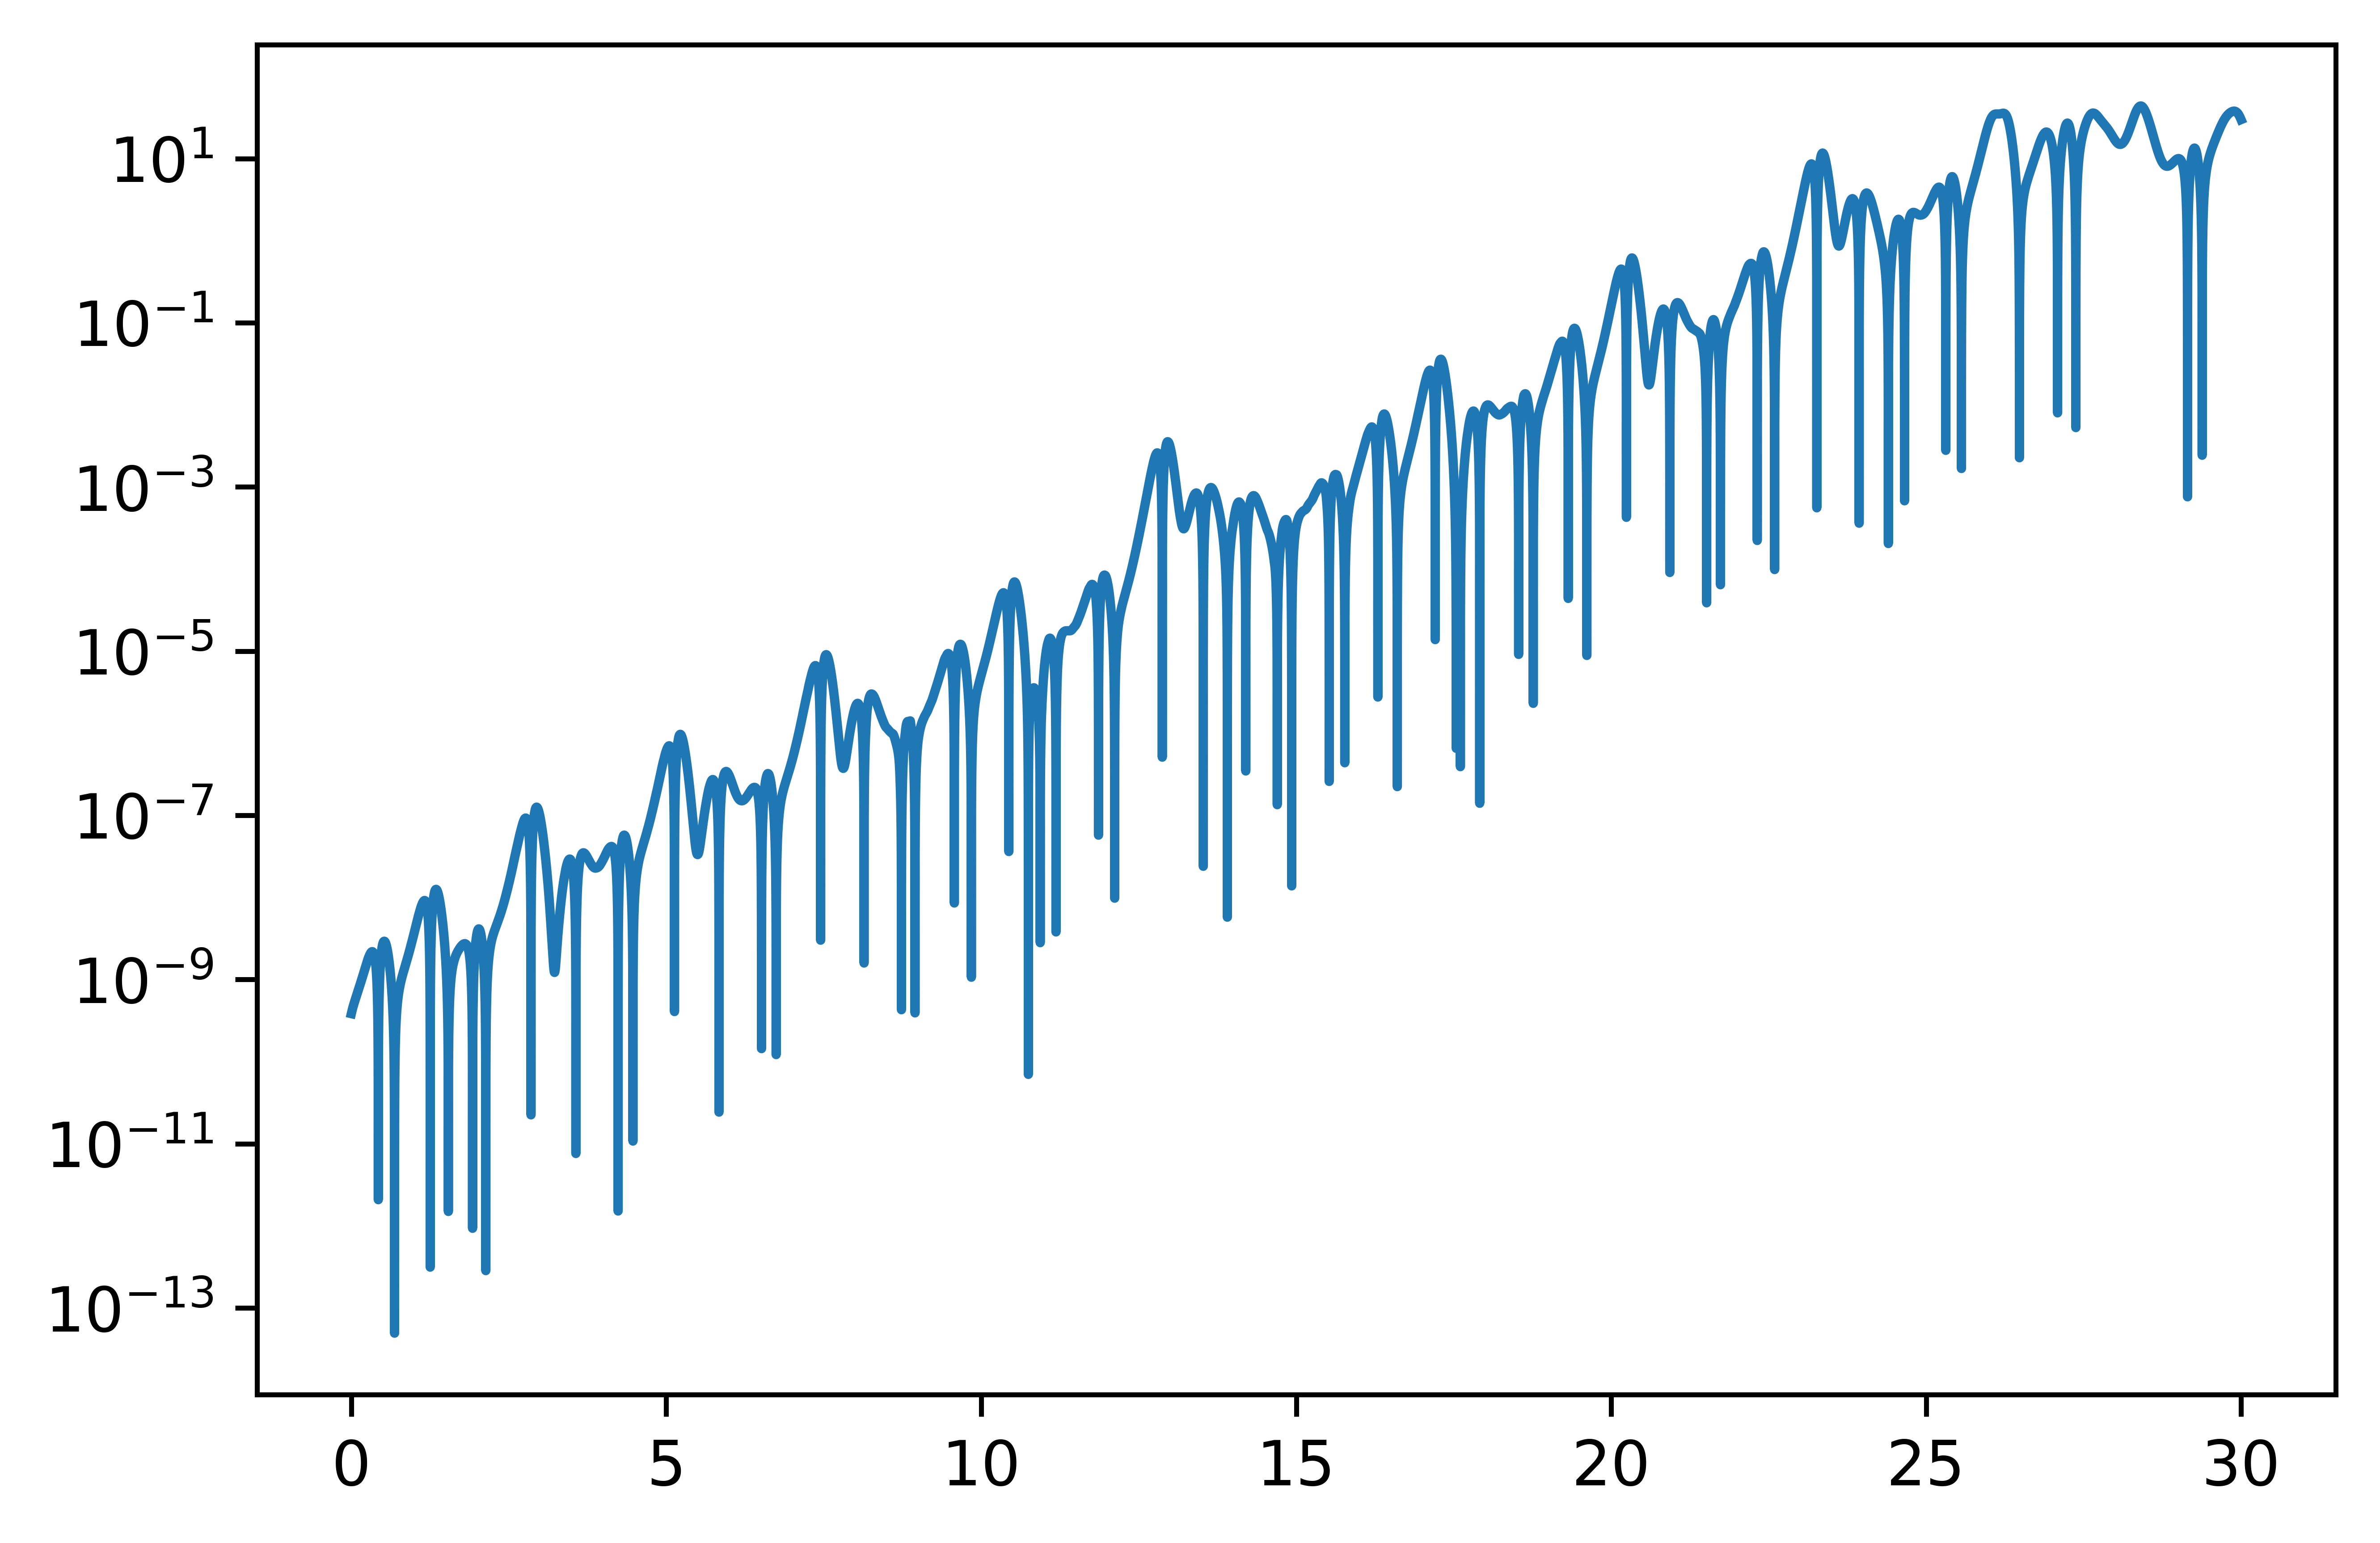

In [1852]:
fig, ax = plt.subplots(1)
ax.plot(sol1.t, dist)
ax.set_yscale('log')
plt.show()

In [1853]:
lmbd = np.polyfit(sol1.t, np.log(np.abs(dist/delta)), 1)
lmbd = lmbd[0]

In [1864]:
d = delta*np.exp(lmbd*sol1.t)

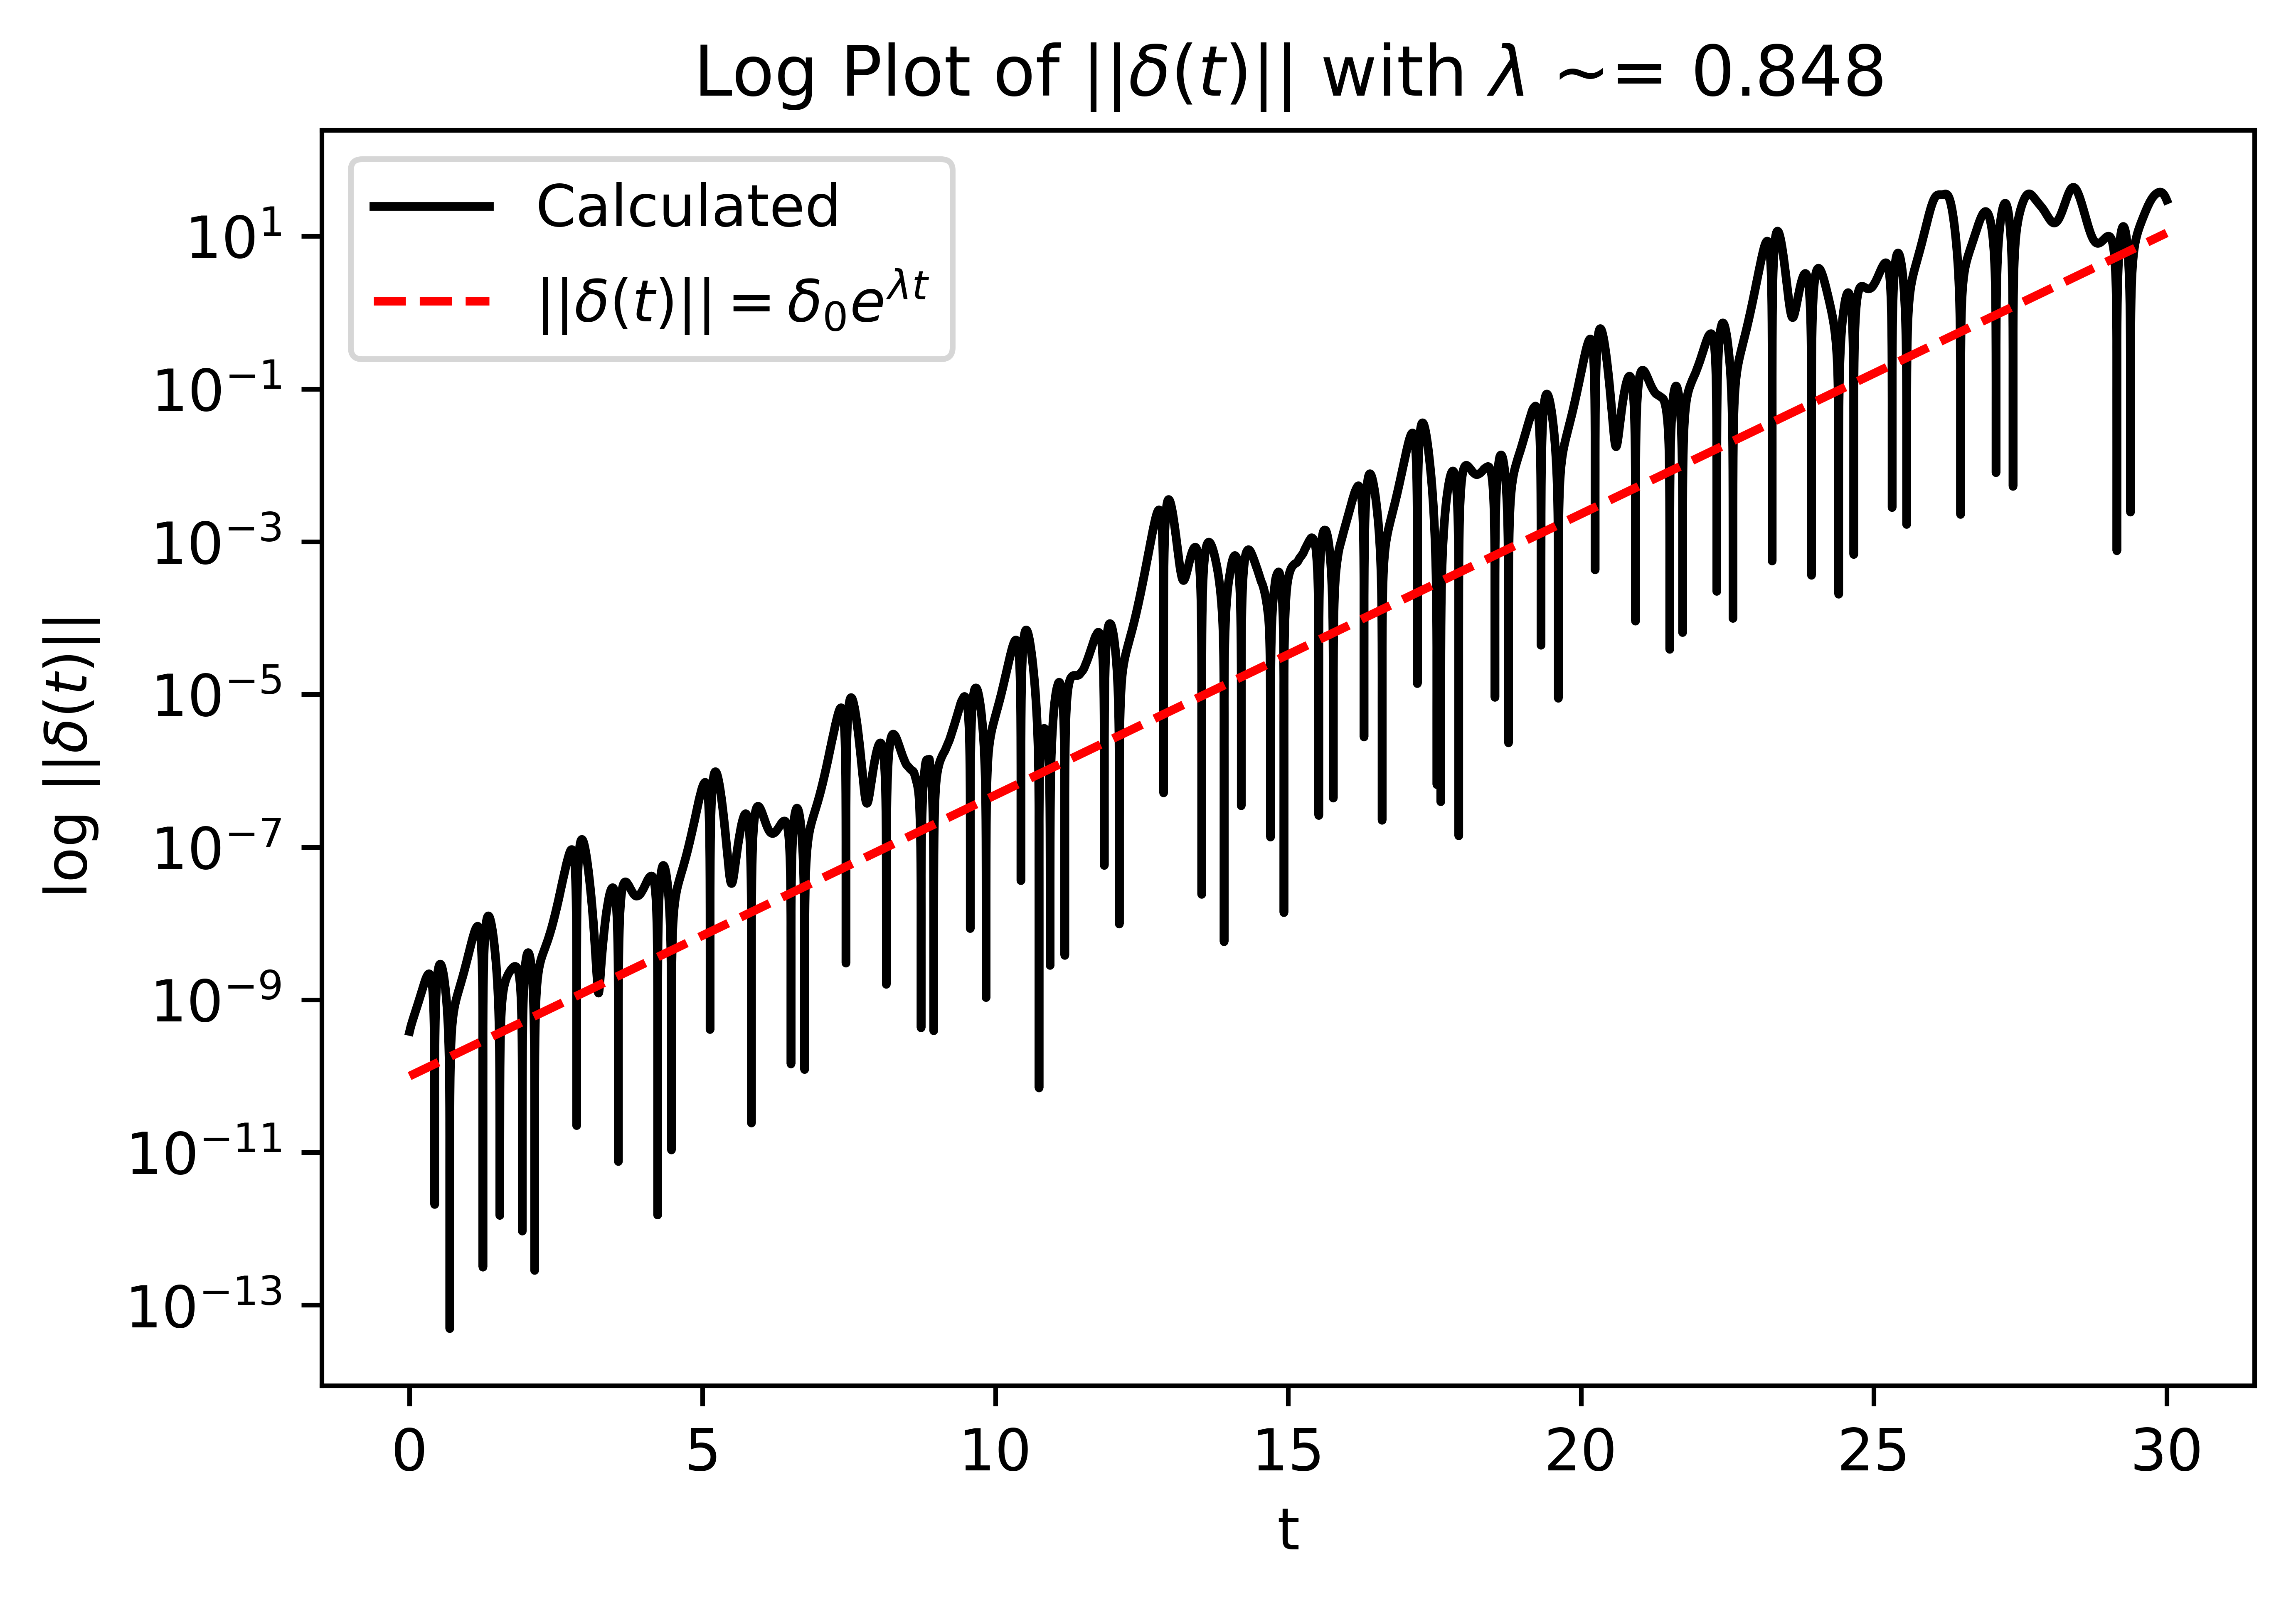

In [1865]:
fig, ax = plt.subplots(1)
ax.plot(sol1.t, dist, 'k-', label = 'Calculated')
ax.plot(sol1.t, d, 'r--', label = '$||\delta(t)|| = \delta_0e^{\lambda t}$')
ax.set_yscale('log')
ax.set_ylabel('log $||\delta(t)||$')
ax.set_xlabel('t')
ax.set_title('Log Plot of $||\delta(t)||$ with $\lambda $ ~= {}'.format(np.round(lmbd,3)))
ax.legend()
plt.show()

In [1866]:
iters=10**5
dt=0.0007
T3=iters * dt

sol = scipy.integrate.solve_ivp(lorenz, [0, T3], y0 = np.ones(3), t_eval=np.linspace(0, T3, iters), args=params)
vn = sol.y.T

U = np.eye(3)
lyap = []

for i in range(iters):
    v0 = vn[i]
    Un = (np.eye(3) + jacobian(v0, sigma, r, b) * dt) @ U

    Q, R = np.linalg.qr(Un)
    lyap.append(np.log(abs(R.diagonal())))

    U = Q #new axes after iteration

lmbdspectrum = [sum([lyap[k][j] for k in range(iters)]) / (T3) for j in range(3)]

In [1867]:
print(lmbdspectrum)

[0.9055072842061708, -0.08446060484708974, -14.509975084579663]
